In [ ]:
#Load packages 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import polars as pl
import pandas as pd

#Load in files 
edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")

In [13]:
# Grace's Code
nodes = pl.read_csv(
    "nodes.csv",
    separator=",",
    encoding="utf8-lossy",  # tolerate encoding errors and BOMs
    ignore_errors=True
) #this uploads the data as a dataframe called "nodes" and enables us to filter the data and drop null (NA) values

nodes.drop_nulls() #drops nulls
filtered_values_race = [1, 2, 3, 4] #can change this to filter out other values from other columns as needed
filtered_values_disabled = [0] #same as above

nodes = nodes.filter(~pl.col("race").is_in(filtered_values_race)) #this would filter out the above values in the race column, so that the only remaining nodes are those of race 5.
nodes = nodes.filter(~pl.col("disabled").is_in(filtered_values_disabled)) #using a similar line of code, we can filter out whichever value of disabled (here I picked 0) at the same time

## important! do not run both this and the other race column one (makes an empty dataframe)
#nodes = nodes.filter(pl.col("race").is_in(filtered_values)) #on the other hand, this would filter in the above race column values so that the remaining nodes are those of every race but race 5

#the "race" column can be replaced with the other column names, and the filtered values can be changed as needed for the project
print(nodes) #displays dataframe

#if we decide a column is irrelevant we can drop it
nodes.drop("housewife")


shape: (2, 14)
┌─────┬──────┬────────┬────────────┬───┬───────────┬──────────┬────────────┬──────────┐
│  id ┆ race ┆ gender ┆ sex.worker ┆ … ┆ housewife ┆ disabled ┆ unemployed ┆ homeless │
│ --- ┆ ---  ┆ ---    ┆ ---        ┆   ┆ ---       ┆ ---      ┆ ---        ┆ ---      │
│ i64 ┆ i64  ┆ i64    ┆ i64        ┆   ┆ i64       ┆ i64      ┆ i64        ┆ i64      │
╞═════╪══════╪════════╪════════════╪═══╪═══════════╪══════════╪════════════╪══════════╡
│ 82  ┆ 5    ┆ 1      ┆ 1          ┆ … ┆ 0         ┆ 1        ┆ 1          ┆ 0        │
│ 160 ┆ 5    ┆ 0      ┆ 0          ┆ … ┆ 0         ┆ 1        ┆ 1          ┆ 0        │
└─────┴──────┴────────┴────────────┴───┴───────────┴──────────┴────────────┴──────────┘


id,race,gender,sex.worker,pimp,sex.work.client,drug.dealer,drug.cook,thief,retired,disabled,unemployed,homeless
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
82,5,1,1,0,0,1,0,0,0,1,1,0
160,5,0,0,0,1,0,0,0,0,1,1,0


shape: (56, 2)
┌───────┬───────┐
│ node1 ┆ node2 │
│ ---   ┆ ---   │
│ i64   ┆ i64   │
╞═══════╪═══════╡
│ 82    ┆ 1     │
│ 82    ┆ 16    │
│ 82    ┆ 75    │
│ 82    ┆ 85    │
│ 82    ┆ 97    │
│ …     ┆ …     │
│ 160   ┆ 1732  │
│ 160   ┆ 1733  │
│ 160   ┆ 1734  │
│ 160   ┆ 1735  │
│ 160   ┆ 4026  │
└───────┴───────┘


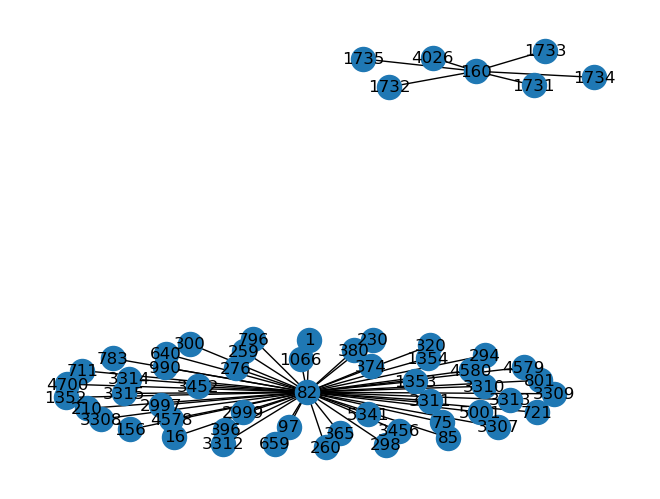

In [12]:
import polars as pl
import networkx as nx
import matplotlib.pyplot as plt

# Load the edges CSV 
edges = pl.read_csv("edges.csv")

# Clean column names (remove leading/trailing spaces)
edges = edges.rename({col: col.strip() for col in edges.columns})

# Now you can safely filter
filtered_values_node1 = [82, 160]
edges = edges.filter(pl.col("node1").is_in(filtered_values_node1))

# Print filtered edges
print(edges)

# Convert Polars DataFrame to Pandas for NetworkX
edges_pd = edges.to_pandas()

# Build and draw the graph
G = nx.from_pandas_edgelist(edges_pd, source="node1", target="node2")
nx.draw(G, with_labels=True)
plt.show()


<Figure size 1200x700 with 0 Axes>

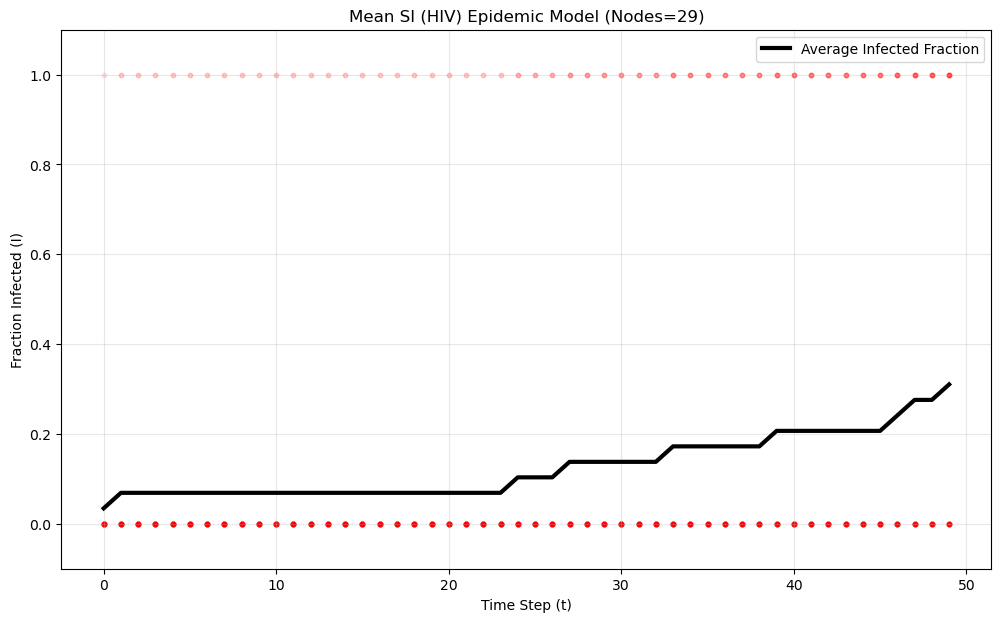

In [15]:
# John's Code
def SI_sim_random_nodes_removed(T, G, beta):
    average_I = []

    for trial in range(2):


        removed_nodes = np.random.choice(G.number_of_nodes(), 5, replace=False)

        remaining_nodes = list(set(range(G.number_of_nodes())) - set(removed_nodes))

    #make graph
        G_sub = G.subgraph(remaining_nodes).copy() 


        A = nx.to_numpy_array(G_sub)


        initial_case = np.random.randint(G_sub.number_of_nodes())


    #Define initial populations
        S0 = np.ones(G_sub.number_of_nodes()) 
        S0[initial_case] = 0 # Making one individual infected
        I0 = np.zeros(G_sub.number_of_nodes())
        I0[initial_case] = 1

    #Store them
        S = [S0]
        I = [I0]

    #Loop over time rangei
        for t in range(T-1):
        #Use the equations to create array of probabilities of becoming infected
        
            prob_array = (A @ I[t] * beta * S[t])

        #Initialize an array of zeros to store the new infected population
            I_new = np.zeros(G_sub.number_of_nodes())
        #Loop over number of individuals
            for i in range(G_sub.number_of_nodes()):
            #
                if I[t][i] == 0:
                    I_new[i] = (np.random.rand() < prob_array[i])
                else:
                    I_new[i] = 1

        # Storing values
            S.append(1-I_new)
            I.append(I_new)

    average_I.append([j.mean() for j in I])
    average_I = np.array(average_I)
    return average_I


T = 50
G = nx.karate_club_graph()
beta = 0.01

average_I = []

for trial in range(2):


    removed_nodes = np.random.choice(G.number_of_nodes(), 5, replace=False)

    remaining_nodes = list(set(range(G.number_of_nodes())) - set(removed_nodes))

#make graph
    G_sub = G.subgraph(remaining_nodes).copy() 


    A = nx.to_numpy_array(G_sub)


    initial_case = np.random.randint(G_sub.number_of_nodes())


#Define initial populations
    S0 = np.ones(G_sub.number_of_nodes()) 
    S0[initial_case] = 0 # Making one individual infected
    I0 = np.zeros(G_sub.number_of_nodes())
    I0[initial_case] = 1

#Store them
    S = [S0]
    I = [I0]

#Loop over time rangei
    for t in range(T-1):
    #Use the equations to create array of probabilities of becoming infected
    
        prob_array = (A @ I[t] * beta * S[t])

    #Initialize an array of zeros to store the new infected population
        I_new = np.zeros(G_sub.number_of_nodes())
    #Loop over number of individuals
        for i in range(G_sub.number_of_nodes()):
        #
            if I[t][i] == 0:
                I_new[i] = (np.random.rand() < prob_array[i])
            else:
                I_new[i] = 1

    # Storing values
        S.append(1-I_new)
        I.append(I_new)

average_I.append([j.mean() for j in I])
average_I = np.array(average_I)



plt.figure(figsize=(12, 7))
plt.figure(figsize=(12, 7))

# Convert the infection history list to a numpy array
I_history = np.array(I)

# 1. Scatter plot for individual node states over time
for t in range(T):
    plt.scatter(
        t * np.ones(I_history[t].shape),
        I_history[t],
        color='red',
        s=10,
        alpha=0.1
    )

# 2. Line plot for the average infected fraction
plt.plot(range(T), average_I.mean(axis=0), 'k-', linewidth=3, label='Average Infected Fraction')

plt.title(f'Mean SI (HIV) Epidemic Model (Nodes={G_sub.number_of_nodes()})')
plt.xlabel('Time Step (t)')
plt.ylabel('Fraction Infected (I)')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [ ]:
# Baanee's Code
# Heatmap of infection results based on vocation and gender

#Step 1: Load Data 
print(nodes.columns)


#Step 2: Combine node info with the graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import polars as pl

# Load and clean
edges = pl.read_csv("edges.csv").rename({c: c.strip() for c in pl.read_csv("edges.csv").columns})
edges = edges.to_pandas() # Convert edges from Polars to pandas DataFrame
nodes = pd.read_csv("nodes.csv")

# Create a single 'vocation' column from multiple binary vocation columns
def get_vocation(row): #Assigns a single vocation label to each node based on binary indicators. 
    #Checks each vocation column in priority order and returns the first match
    if row["sex.worker"] == 1:
        return "sex worker"
    elif row["pimp"] == 1:
        return "pimp"
    elif row["sex.work.client"] == 1:
        return "client"
    elif row["drug.dealer"] == 1:
        return "drug dealer"
    elif row["drug.cook"] == 1:
        return "drug cook"
    elif row["thief"] == 1:
        return "thief"
    elif row["retired"] == 1:
        return "retired"
    elif row["housewife"] == 1:
        return "housewife"
    elif row["disabled"] == 1:
        return "disabled"
    elif row["unemployed"] == 1:
        return "unemployed"
    elif row["homeless"] == 1:
        return "homeless"
    else:
        return "other"

nodes["vocation"] = nodes.apply(get_vocation, axis=1) # Apply function to create new 'vocation' column

# Build graph
G = nx.from_pandas_edgelist(edges, source="node1", target="node2") # Create undirected graph from edges

# Add node attributes (make sure node IDs match)
for i, row in nodes.iterrows():
    node_id = row[" id"]  # Note: there is a space before 'id' in the CSV column
    if node_id in G.nodes:
        nx.set_node_attributes(G, {
            node_id: {
                "gender": row["gender"],
                "vocation": (
                    "sex worker" if row["sex.worker"] == 1 else
                    "pimp" if row["pimp"] == 1 else
                    "drug dealer" if row["drug.dealer"] == 1 else
                    "thief" if row["thief"] == 1 else
                    "unemployed" if row["unemployed"] == 1 else
                    "other"
                )
            }
        })

#Step 3: Run SI model by category
def simulate_and_measure(G, beta=0.01, T=30):
    A = nx.to_numpy_array(G) # Convert graph to adjacency matrix
    n = len(G) # Number of nodes
    I = np.zeros((T, n))
    infected = np.random.randint(0, n) # Randomly select a node to start infection
    I[0, infected] = 1 # Mark first node as infected

    for t in range(1, T):
        prob = (A @ I[t-1]) * beta # Probability of infection from neighbors
        new_infected = (np.random.rand(n) < prob) | (I[t-1] == 1) # Update infection status
        I[t] = new_infected
    return I.mean(axis=1).mean()  # mean infected over time 

#Get unique genders and vocations for looping
genders = nodes["gender"].unique()
vocations = nodes["vocation"].unique()

results = [] #Run SI simulations removing nodes by gender and vocation

for g in genders: #Loop over genders
    row = []
    for v in vocations:
        removed = nodes[(nodes["gender"] == g) & (nodes["vocation"] == v)][" id"].tolist()
        G_sub = G.copy()
        G_sub.remove_nodes_from(removed)
        mean_infected = simulate_and_measure(G_sub)
        row.append(mean_infected)
    results.append(row)

#Create a DataFrame for heatmap visualization
heatmap_data = pd.DataFrame(results, index=genders, columns=vocations)

Index([' id', 'race', 'gender', 'sex.worker', 'pimp', 'sex.work.client',
       'drug.dealer', 'drug.cook', 'thief', 'retired', 'housewife', 'disabled',
       'unemployed', 'homeless', 'vocation'],
      dtype='object')


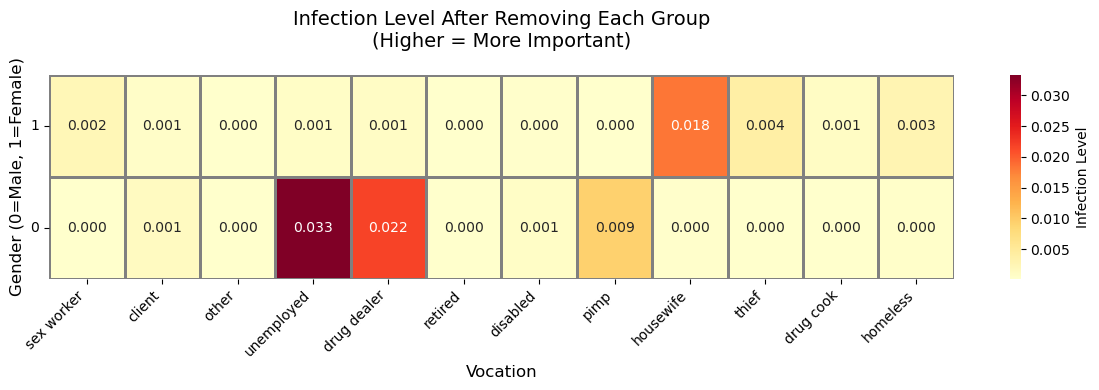


Top 5 Most Important/Protective Groups:
1. Male unemployed: 0.0334
2. Male drug dealer: 0.0217
3. Female housewife: 0.0183
4. Male pimp: 0.0094
5. Female thief: 0.0039


In [28]:
# Step 4: PLOTTING
plt.figure(figsize=(12, 4))  # Make it wider

# Create heatmap
sns.heatmap(heatmap_data, 
            annot=True,           # Show numbers
            fmt=".3f",            # 3 decimal places
            cmap="YlOrRd",        # Yellow to red colors
            linewidths=1,         # Lines between cells
            linecolor='gray',     # Gray lines
            cbar_kws={'label': 'Infection Level'})  # Label for color bar

# Labels
plt.title("Infection Level After Removing Each Group\n(Higher = More Important)", 
          fontsize=14, pad=20)
plt.xlabel("Vocation", fontsize=12)
plt.ylabel("Gender (0=Male, 1=Female)", fontsize=12)

# Rotate x-axis labels so they don't overlap
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Make layout tight so nothing gets cut off
plt.tight_layout()
plt.show()

# Print top 5 most important groups
print("\nTop 5 Most Important/Protective Groups:")
print("="*50)

# Flatten the data to find highest values
all_values = []
for gender in genders:
    for vocation in vocations:
        value = heatmap_data.loc[gender, vocation]
        all_values.append((gender, vocation, value))

# Sort by value
all_values.sort(key=lambda x: x[2], reverse=True)

# Print top 5
for i, (gender, vocation, value) in enumerate(all_values[:5], 1):
    gender_name = "Female" if gender == 1 else "Male"
    print(f"{i}. {gender_name} {vocation}: {value:.4f}")

Male unemployed people are PROTECTIVE in the network
They help SLOW DOWN disease spread. Removing them makes things worse

/var/folders/0f/vd791m756_73hyltbvmjhk900000gn/T/ipykernel_12736/1548380935.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0007686395080707148' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[g, v] += I_node[node_indices].mean()
/var/folders/0f/vd791m756_73hyltbvmjhk900000gn/T/ipykernel_12736/1548380935.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.401423487544484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[g, v] += I_node[node_indices].mean()
/var/folders/0f/vd791m756_73hyltbvmjhk900000gn/T/ipykernel_12736/1548380935.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4633333333333334' has dtype incomp

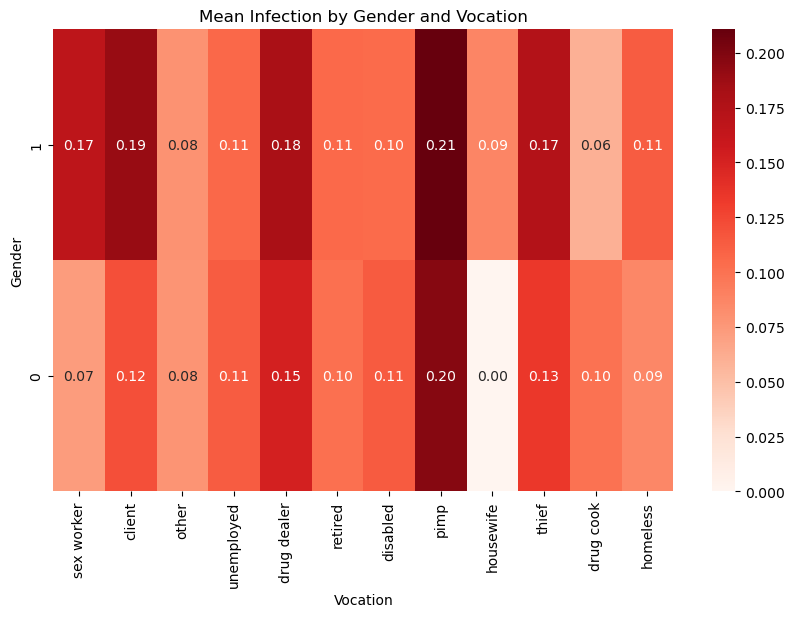

In [35]:
# Map node IDs to adjacency matrix indices
node_list = list(G.nodes())
node_to_idx = {node_id: idx for idx, node_id in enumerate(node_list)}

heatmap_data = pd.DataFrame(0, index=genders, columns=vocations)
n_simulations = 50
T = 30
beta = 0.05

for sim in range(n_simulations):
    I_node = simulate_and_measure_per_node(G, beta=beta, T=T)  # per-node infection
    for g in genders:
        for v in vocations:
            group_nodes = nodes[(nodes["gender"] == g) & (nodes["vocation"] == v)][" id"].tolist()
            node_indices = [node_to_idx[n] for n in group_nodes if n in node_to_idx]  # map to adjacency matrix
            if len(node_indices) > 0:
                heatmap_data.loc[g, v] += I_node[node_indices].mean()

heatmap_data /= n_simulations

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds")
plt.title("Mean Infection by Gender and Vocation")
plt.ylabel("Gender")
plt.xlabel("Vocation")
plt.show()


The heatmap shows the average infection across simulations for different gender-vocation groups, with rows representing gender and columns representing vocation. Each cell reflects the mean infection level for that group. Visually, darker red cells indicate groups that are more heavily affected by infection, while lighter colors or white indicate groups with low or no infection. Some cells may appear as zero or very light because the group is small (containing few nodes), the nodes may be disconnected or far from initial infections, or the infection probability (beta) is low enough that infections rarely reach them.

In [43]:
# Baanee's Code for Newman Coefficient 

import pandas as pd
import networkx as nx

# Load data
edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")

# Clean column names to remove hidden spaces
nodes.columns = nodes.columns.str.strip()

# Create a single 'vocation' column from multiple binary vocation columns
def get_vocation(row):
    if row["sex.worker"] == 1:
        return "sex worker"
    elif row["pimp"] == 1:
        return "pimp"
    elif row["sex.work.client"] == 1:
        return "client"
    elif row["drug.dealer"] == 1:
        return "drug dealer"
    elif row["drug.cook"] == 1:
        return "drug cook"
    elif row["thief"] == 1:
        return "thief"
    elif row["retired"] == 1:
        return "retired"
    elif row["housewife"] == 1:
        return "housewife"
    elif row["disabled"] == 1:
        return "disabled"
    elif row["unemployed"] == 1:
        return "unemployed"
    elif row["homeless"] == 1:
        return "homeless"
    else:
        return "other"

# Apply function to create new 'vocation' column
nodes["vocation"] = nodes.apply(get_vocation, axis=1)

# Create graph
G = nx.from_pandas_edgelist(edges, source="node1", target="node2")

# Add node attributes
vocation_dict = pd.Series(nodes["vocation"].values, index=nodes["id"]).to_dict()
nx.set_node_attributes(G, vocation_dict, "vocation")

# Compute categorical assortativity
assortativity_vocation = nx.attribute_assortativity_coefficient(G, "vocation")
print(f"Vocation assortativity: {assortativity_vocation:.3f}")


Vocation assortativity: 0.142


      u     v  dist  reachable
0   853  4894   inf      False
1  1814  2596   7.0       True
2    99   867   3.0       True
3  4987   778   inf      False
4  4198  4708   5.0       True
5  2315  1699   inf      False
6  1982  1205   inf      False
7  4400  5322   inf      False
8   415  3042   inf      False
9  5047   399   4.0       True


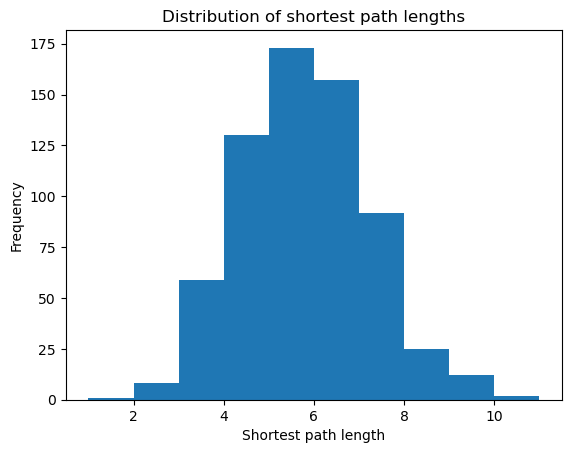

In [ ]:
#Shortest Path Simulation (Random Pair Sampling)
import pandas as pd
import numpy as np
import networkx as nx
import random

# Load graph 
nodes = pd.read_csv("nodes.csv")
edges = pd.read_csv("edges.csv")
ucol, vcol = edges.columns[:2] # Get the names of the first two columns in edges.csv (the node pair)

G = nx.Graph() # Create an undirected NetworkX graph
G.add_nodes_from(nodes[nodes.columns[0]]) # Add all nodes to the graph
for _, row in edges.iterrows(): # Add edges one by one
    G.add_edge(row[ucol], row[vcol])

# Shortest path sampling
def shortest_path_samples(G, n_samples=1000): # Randomly sample node pairs and compute their shortest path distance.
    nodes = list(G.nodes())
    records = []

    for _ in range(n_samples): 
        u, v = random.sample(nodes, 2)         # Randomly pick two different nodes
        try:         # Try computing the shortest path length
            d = nx.shortest_path_length(G, u, v)
        except nx.NetworkXNoPath:             # If nodes are disconnected, mark as infinite distance
            d = np.inf
        records.append({"u": u, "v": v, "dist": d})         # Save the result
    return pd.DataFrame(records)

sp = shortest_path_samples(G) # Run the sampling

sp.to_csv("shortest_path_samples.csv", index=False)

sp_clean = sp.copy()
sp_clean["reachable"] = sp_clean["dist"].apply(lambda x: x != np.inf)

# Print first 10 rows
print(sp_clean.head(10))

#Visualize shortest path
import matplotlib.pyplot as plt

# Filter only finite distances (reachable pairs)
finite = sp[np.isfinite(sp["dist"])]["dist"]

# Plot histogram of distances
plt.hist(finite, bins=range(1, int(finite.max())+2))
plt.xlabel("Shortest path length")
plt.ylabel("Frequency")
plt.title("Distribution of shortest path lengths")
plt.show()


In [54]:
#Community Detection (Louvain)
import pandas as pd
import networkx as nx

# Load graph 
nodes = pd.read_csv("nodes.csv")
edges = pd.read_csv("edges.csv")
ucol, vcol = edges.columns[:2]

G = nx.Graph()
G.add_nodes_from(nodes[nodes.columns[0]])
for _, row in edges.iterrows():
    G.add_edge(row[ucol], row[vcol])

# Community detection 
from networkx.algorithms.community import louvain_communities

communities = louvain_communities(G, seed=42)

# Convert to node for community mapping
rows = []
for cid, comm in enumerate(communities):
    for node in comm:
        rows.append({"node": node, "community": cid})

df_comm = pd.DataFrame(rows)
df_comm.to_csv("community_membership.csv", index=False)

print(df_comm.head())

   node  community
0  2824          0
1  2825          0
2    11          0
3    18          1
4    26          2


The community detection analysis groups individuals in the HIV network into clusters based on how closely they are connected. Nodes that belong to the same community share many connections with each other, forming tightly linked subgroups, while having fewer links to other communities. For example, nodes 2824, 2825, and 11 all fall into Community 0, meaning they are part of the same dense cluster, whereas nodes like 18 and 26 belong to different communities. Overall, the network contains many such clusters, including one very large community of over 800 individuals, suggesting that the epidemic is driven by a few large, interconnected groups rather than a single uniform network.